<a href="https://colab.research.google.com/github/Srinivasareddy01/Mini-Project/blob/main/Image_classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.67 ms (started: 2021-06-28 16:19:01 +00:00)


In [5]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
 
target = []
images = []
flat_data = []
 
datadir = '/content/drive/MyDrive/ML/Data of Images'
Categories = ['car','bike','helicopter','flights','tiger']   # car = 0 , bike = 1 ,helicopter = 2 , flights = 3 , tiger = 4
for i in Categories:
  class_num = Categories.index(i)   # label encoding the images
  path = os.path.join(datadir,i)    # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(250,250,3))   # normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())   # flattening the data
    images.append(img_resized)
    target.append(class_num)
    
 
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 49.7 s (started: 2021-06-28 16:22:28 +00:00)


In [6]:
flat_data

array([[0.36894118, 0.40650196, 0.0648058 , ..., 0.96619027, 0.95121773,
        0.93440408],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.0049098 , 0.        ,
        0.00098824],
       [0.63145898, 0.44322369, 0.35694918, ..., 0.48630168, 0.49022325,
        0.4706154 ],
       ...,
       [0.27206275, 0.71515294, 0.26026667, ..., 0.52147937, 0.36098416,
        0.0903862 ],
       [0.74682538, 0.56643322, 0.43655871, ..., 0.35738083, 0.29463573,
        0.2358122 ],
       [0.40517929, 0.34427777, 0.2413952 , ..., 0.25187081, 0.21265512,
        0.11461591]])

time: 4.27 ms (started: 2021-06-28 16:23:26 +00:00)


In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

time: 8.24 ms (started: 2021-06-28 16:23:30 +00:00)


<BarContainer object of 5 artists>

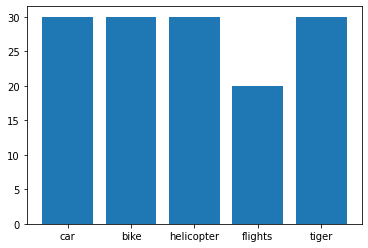

time: 153 ms (started: 2021-06-28 16:23:33 +00:00)


In [8]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [9]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.6,random_state=42)

time: 190 ms (started: 2021-06-28 16:23:35 +00:00)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'kernel':['poly']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 8s (started: 2021-06-28 16:23:38 +00:00)


In [11]:
y_pred = clf.predict(x_test)
y_pred

array([3, 2, 1, 1, 2, 0, 3, 4, 2, 1, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 0, 1,
       1, 4, 4, 1, 4, 2, 1, 4, 3, 4, 4, 2, 3, 1, 3, 4, 3, 1, 4, 1, 1, 4,
       0, 4, 4, 1, 4, 4, 1, 4, 1, 0, 2, 3, 4, 1, 2, 2, 4, 0, 2, 4, 2, 4,
       3, 4, 4, 1, 3, 2, 4, 1, 1, 4, 0, 4, 3, 2, 4, 4, 3, 4])

time: 1.47 s (started: 2021-06-28 16:30:29 +00:00)


In [12]:
y_test

array([3, 2, 1, 4, 1, 0, 2, 2, 3, 3, 4, 1, 2, 0, 4, 2, 0, 0, 4, 4, 1, 4,
       2, 0, 4, 0, 4, 3, 0, 0, 0, 4, 3, 3, 1, 1, 2, 4, 2, 0, 1, 0, 1, 0,
       3, 4, 4, 2, 1, 0, 2, 1, 0, 3, 2, 3, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       2, 4, 1, 0, 2, 2, 1, 1, 1, 3, 0, 1, 2, 2, 4, 4, 0, 0])

time: 4.05 ms (started: 2021-06-28 16:30:34 +00:00)


In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

time: 1.22 ms (started: 2021-06-28 16:30:36 +00:00)


In [14]:
confusion_matrix(y_pred,y_test)

array([[ 2,  2,  0,  2,  0],
       [ 6,  6,  3,  1,  2],
       [ 0,  1,  8,  3,  0],
       [ 2,  1,  8,  2,  0],
       [10,  8,  2,  2, 13]])

time: 5.08 ms (started: 2021-06-28 16:30:38 +00:00)


In [15]:
accuracy_score(y_pred,y_test)

0.36904761904761907

time: 4.37 ms (started: 2021-06-28 16:30:41 +00:00)


In [16]:
import pickle   # saving the model using pickle library
pickle.dump(clf,open('img_model.p','wb'))

time: 128 ms (started: 2021-06-28 16:30:45 +00:00)


In [17]:
model = pickle.load(open('img_model.p','rb'))

time: 104 ms (started: 2021-06-28 16:30:48 +00:00)


enter your url : https://th.bing.com/th/id/OIP.0Udno0y-8hVI5lmMbUPH_AHaGh?w=200&h=180&c=7&o=5&dpr=1.38&pid=1.7
(248, 276, 3)
PREDICTED OUTPUT: bike


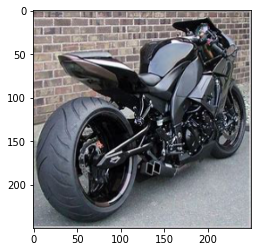

time: 3.21 s (started: 2021-06-28 16:31:53 +00:00)


In [19]:
# testing a brand new image
flat_data = []
url = input('enter your url : ')
img = imread(url)
img_resized = resize(img,(250,250,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')